### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing dataset

In [2]:
df=pd.read_csv('gld_price_data.csv')

### EDA

In [3]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [5]:
df.shape

(2290, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


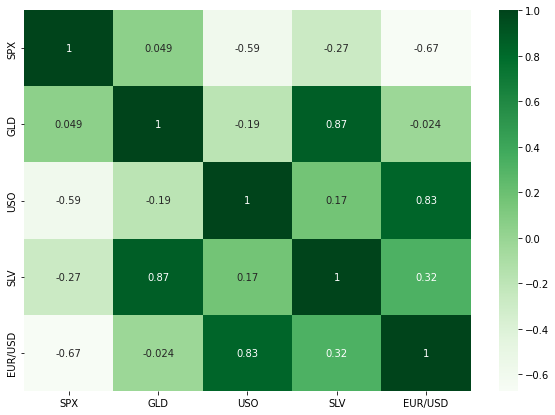

In [7]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,cmap='Greens')
plt.show()

In [8]:
df.corr()

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


### Feature engineering

In [9]:
df.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [10]:
df.Date.value_counts()

1/2/2008      1
12/15/2014    1
12/5/2014     1
12/8/2014     1
12/9/2014     1
             ..
6/14/2011     1
6/13/2011     1
6/9/2011      1
6/8/2011      1
5/16/2018     1
Name: Date, Length: 2290, dtype: int64

In [11]:
df.drop('Date',axis=1,inplace=True)

In [12]:
df.head()

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


### Separating dependant and independant variables

In [13]:
X=df.drop('EUR/USD',axis=1)
y=df['EUR/USD']

In [14]:
y

0       1.471692
1       1.474491
2       1.475492
3       1.468299
4       1.557099
          ...   
2285    1.186789
2286    1.184722
2287    1.191753
2288    1.193118
2289    1.182033
Name: EUR/USD, Length: 2290, dtype: float64

In [15]:
X

,SPX,GLD,USO,SLV
0,1447.160034,84.860001,78.470001,15.1800
1,1447.160034,85.570000,78.370003,15.2850
2,1411.630005,85.129997,77.309998,15.1670
3,1416.180054,84.769997,75.500000,15.0530
4,1390.189941,86.779999,76.059998,15.5900
...,...,...,...,...
2285,2671.919922,124.589996,14.060000,15.5100
2286,2697.790039,124.330002,14.370000,15.5300
2287,2723.070068,125.180000,14.410000,15.7400
2288,2730.129883,124.489998,14.380000,15.5600


### Performing train-test split

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Feature scaling

In [17]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

### Fitting linear regression

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr=LinearRegression()
lr.fit(X_train,y_train)
y_hat=lr.predict(X_test)
print("train accuracy:",lr.score(X_train,y_train))
print("test accuracy:",lr.score(X_test,y_test))
print("mean sqaured error:",mean_squared_error(y_hat,y_test))

train accuracy: 0.7614120297197526
test accuracy: 0.7527619421089898
mean sqaured error: 0.004331009747745428


### Fitting decision tree regressor

In [19]:
from sklearn.tree import DecisionTreeRegressor
dr=DecisionTreeRegressor()
dr.fit(X_train,y_train)
y_hat1=dr.predict(X_test)
print("train accuracy:",dr.score(X_train,y_train))
print("test accuracy:",dr.score(X_test,y_test))
print("mean sqaured error:",mean_squared_error(y_hat1,y_test))

train accuracy: 1.0
test accuracy: 0.9319663081726668
mean sqaured error: 0.0011917848934454144


### Fitting random forest regressor

In [20]:
from sklearn.ensemble import RandomForestRegressor
rr=RandomForestRegressor()
rr.fit(X_train,y_train)
y_hat2=rr.predict(X_test)
print("train accuracy:",rr.score(X_train,y_train))
print("test accuracy:",rr.score(X_test,y_test))
print("mean sqaured error:",mean_squared_error(y_hat2,y_test))

train accuracy: 0.9975401861701152
test accuracy: 0.9463441609955183
mean sqaured error: 0.0009399198640134577


### Fitting XGboostregressor

In [21]:
from xgboost import XGBRegressor
xg=XGBRegressor()
xg.fit(X_train,y_train)
y_hat3=xg.predict(X_test)
print("train accuracy:",xg.score(X_train,y_train))
print("test accuracy:",xg.score(X_test,y_test))
print("mean sqaured error:",mean_squared_error(y_hat3,y_test))

train accuracy: 0.9985560938769553
test accuracy: 0.9451833059284594
mean sqaured error: 0.0009602552227929205


### We can use random forest regressor or xgboost regressor